In [1]:
from sklearn import datasets
import matplotlib.pyplot as plt

In [2]:
digits = datasets.load_digits()

In [3]:
from sklearn.model_selection import train_test_split
import numpy as np

In [32]:
X = digits.data
y = digits.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [12]:
X.shape

(1797, 64)

In [17]:
print(X_train.shape)
print(y_train.shape)

(1437, 64)
(1437,)


In [18]:
print(X_test.shape)
print(y_test.shape)

(360, 64)
(360,)


In [19]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score

In [33]:
neighbors_number = np.arange(1, 21)
train_accuracy = np.empty(len(neighbors_number))
test_accuracy = np.empty(len(neighbors_number))
for i, k in enumerate(neighbors_number):
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    train_accuracy[i] = knn.score(X_train, y_train)
    test_accuracy[i] = knn.score(X_test, y_test)
    print(k, train_accuracy[i], test_accuracy[i])

1 1.0 0.988888888889
2 0.989561586639 0.980555555556
3 0.990953375087 0.983333333333
4 0.991649269311 0.975
5 0.990257480863 0.975
6 0.990257480863 0.972222222222
7 0.990953375087 0.975
8 0.989561586639 0.975
9 0.987473903967 0.975
10 0.986082115518 0.972222222222
11 0.988865692415 0.972222222222
12 0.98469032707 0.972222222222
13 0.98469032707 0.972222222222
14 0.983994432846 0.969444444444
15 0.983994432846 0.969444444444
16 0.98121085595 0.969444444444
17 0.98121085595 0.966666666667
18 0.979819067502 0.966666666667
19 0.978427279054 0.961111111111
20 0.977035490605 0.963888888889


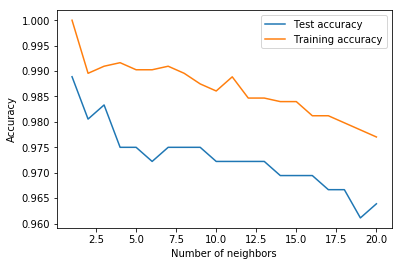

In [34]:
plt.plot(neighbors_number, test_accuracy, label = 'Test accuracy')
plt.plot(neighbors_number, train_accuracy, label = 'Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

When k = 3, the test_accuracy is the highest: 0.983

In [31]:
from sklearn import svm
from sklearn.metrics import classification_report

In [35]:
svm_md = svm.SVC(kernel = 'linear')
svm_md.fit(X_train, y_train)

y_pred = svm_md.predict(X_test)

In [37]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        27
          1       0.94      0.97      0.96        35
          2       0.97      1.00      0.99        36
          3       0.97      1.00      0.98        29
          4       0.97      1.00      0.98        30
          5       0.97      0.97      0.97        40
          6       1.00      0.98      0.99        44
          7       1.00      0.97      0.99        39
          8       0.97      0.95      0.96        39
          9       0.97      0.95      0.96        41

avg / total       0.98      0.98      0.98       360



In [38]:
svm_md_rbf = svm.SVC(kernel = 'rbf')
svm_md_rbf.fit(X_train, y_train)

y_pred_rbf = svm_md_rbf.predict(X_test)

In [40]:
print(classification_report(y_test, y_pred_rbf))

             precision    recall  f1-score   support

          0       1.00      0.67      0.80        27
          1       1.00      0.17      0.29        35
          2       1.00      0.25      0.40        36
          3       0.11      1.00      0.19        29
          4       1.00      0.50      0.67        30
          5       1.00      0.15      0.26        40
          6       1.00      0.39      0.56        44
          7       1.00      0.23      0.38        39
          8       0.00      0.00      0.00        39
          9       1.00      0.20      0.33        41

avg / total       0.82      0.33      0.37       360



D:\Downloads\WinPython\python-3.6.5.amd64\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Linear kernel is prefered in this case, in my opinion

In [48]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix

nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)

In [50]:
print(classification_report(y_test, y_pred_nb))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        27
          1       0.66      0.89      0.76        35
          2       0.94      0.47      0.63        36
          3       0.89      0.83      0.86        29
          4       1.00      0.73      0.85        30
          5       0.97      0.88      0.92        40
          6       1.00      1.00      1.00        44
          7       0.74      1.00      0.85        39
          8       0.54      0.82      0.65        39
          9       0.96      0.63      0.76        41

avg / total       0.87      0.82      0.83       360



In [49]:
print(confusion_matrix(y_test, y_pred_nb))

[[27  0  0  0  0  0  0  0  0  0]
 [ 0 31  0  0  0  0  0  0  4  0]
 [ 0  7 17  0  0  0  0  0 12  0]
 [ 0  0  1 24  0  0  0  0  4  0]
 [ 0  1  0  0 22  0  0  7  0  0]
 [ 0  1  0  0  0 35  0  3  0  1]
 [ 0  0  0  0  0  0 44  0  0  0]
 [ 0  0  0  0  0  0  0 39  0  0]
 [ 0  5  0  0  0  1  0  1 32  0]
 [ 0  2  0  3  0  0  0  3  7 26]]


In [52]:
import pandas as pd

df_cm = pd.DataFrame(confusion_matrix(y_test, y_pred_nb), index = [i for i in range(0, 10)], columns = [i for i in range(0, 10)])

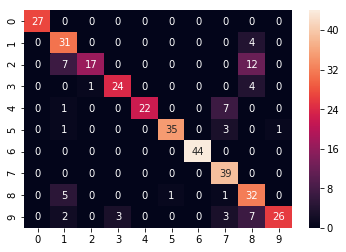

In [53]:
import seaborn as sn

sn.heatmap(df_cm, annot = True)